Starbucks data analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the dataset
data_path = 'starbucks.csv'
starbucks_df = pd.read_csv(data_path)
starbucks_df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [10]:
# Extract size information for the visualization of Calories & Size
starbucks_df['Size'] = starbucks_df['Beverage_prep'].str.extract('(Short|Tall|Grande|Venti)')

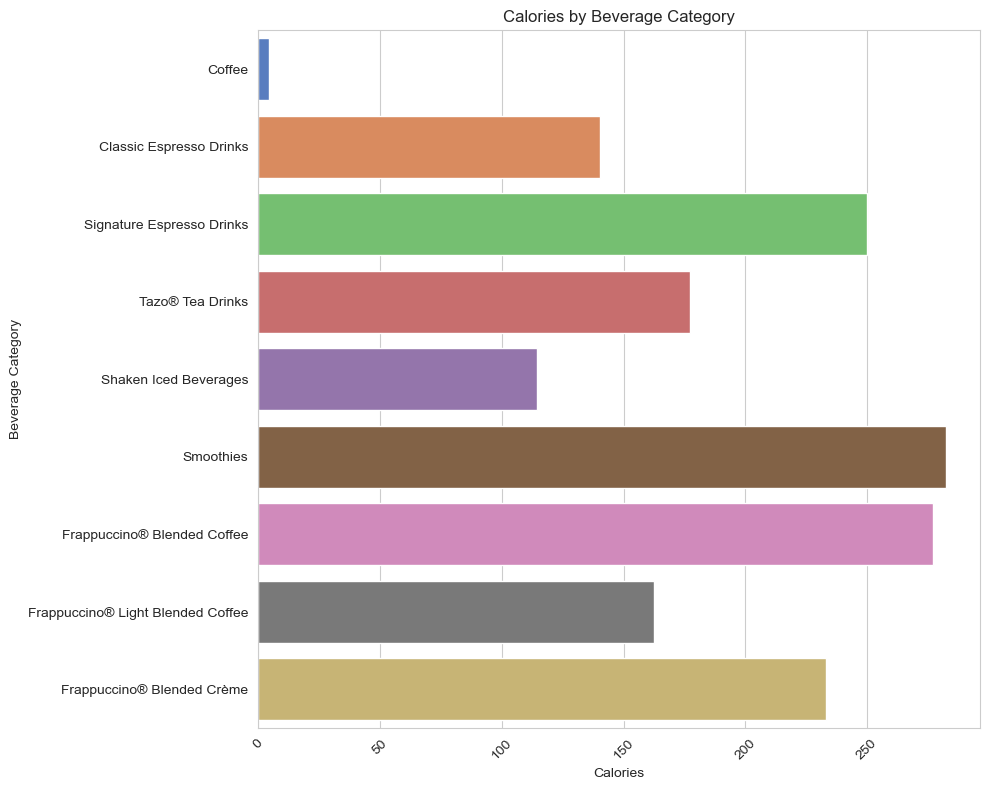

In [20]:
# Visualize Calories by Beverage Category
plt.figure(figsize=(10, 8))
sns.barplot(x='Calories', y='Beverage_category', data=starbucks_df, ci=None, palette="muted")
plt.title('Calories by Beverage Category')
plt.xlabel('Calories')
plt.ylabel('Beverage Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

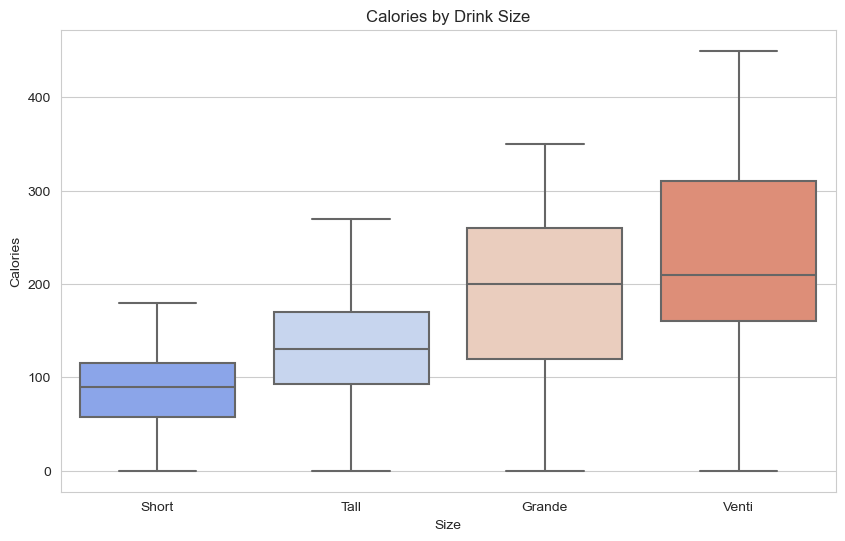

In [12]:
# Visualize Calories by Drink Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Size', y='Calories', data=starbucks_df, palette="coolwarm")
plt.title('Calories by Drink Size')
plt.xlabel('Size')
plt.ylabel('Calories')
plt.show()

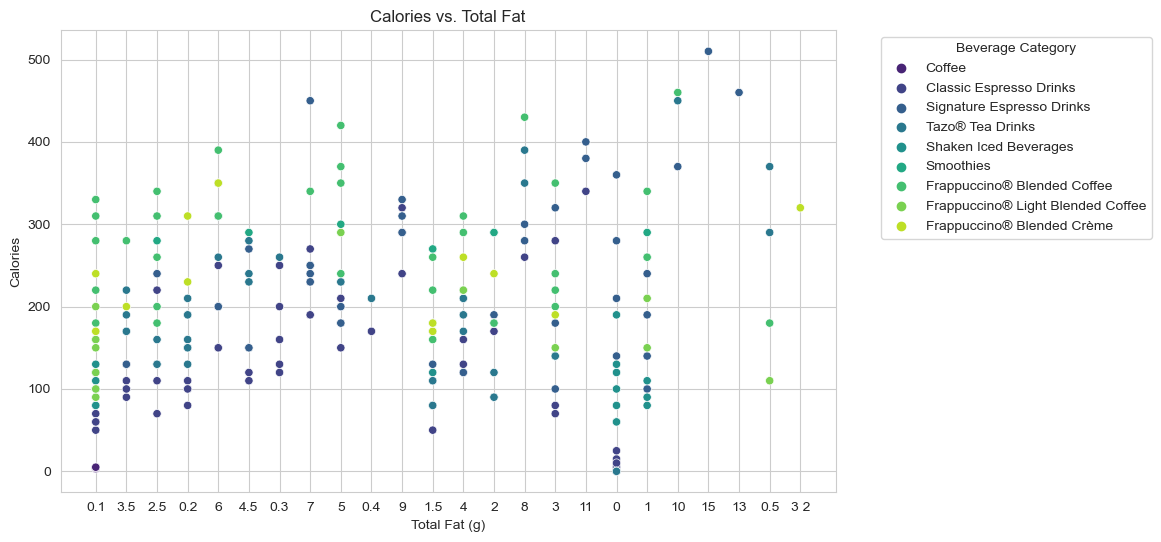

In [13]:
# Visualize Calories vs. Total Fat
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Total Fat (g)', y='Calories', data=starbucks_df, hue='Beverage_category', palette="viridis")
plt.title('Calories vs. Total Fat')
plt.xlabel('Total Fat (g)')
plt.ylabel('Calories')
plt.legend(title='Beverage Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

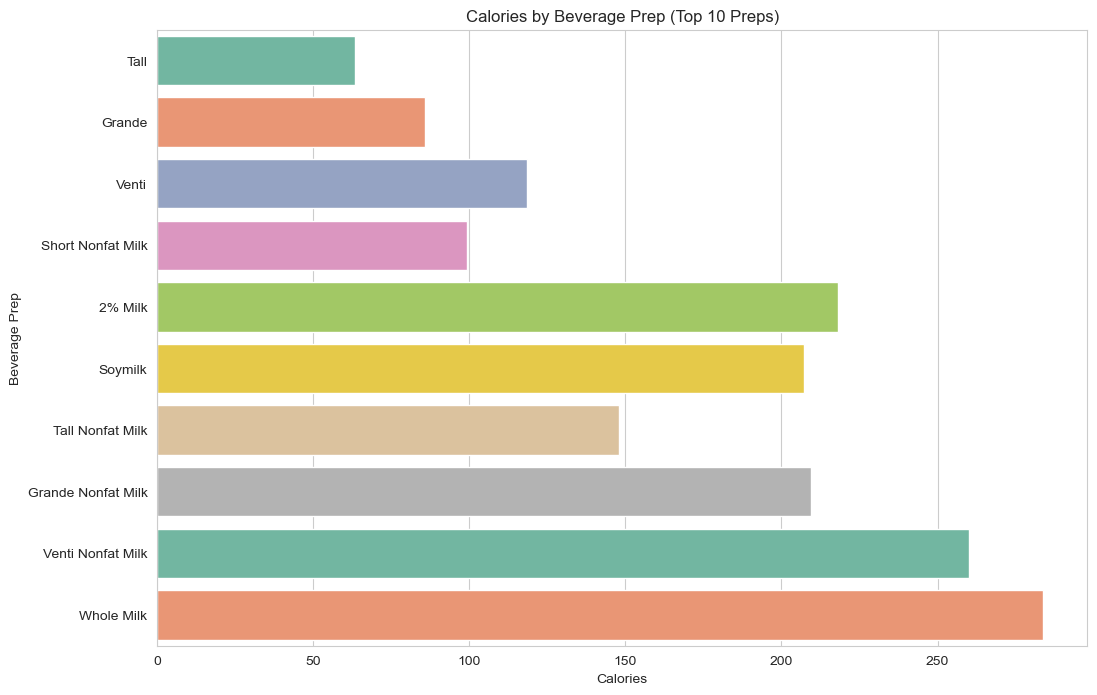

In [21]:
# Visualize Calories by Beverage Prep for the top 10 preps
top_10_preps = starbucks_df['Beverage_prep'].value_counts().head(10).index
filtered_df = starbucks_df[starbucks_df['Beverage_prep'].isin(top_10_preps)]
plt.figure(figsize=(12, 8))
sns.barplot(x='Calories', y='Beverage_prep', data=filtered_df, ci=None, palette="Set2")
plt.title('Calories by Beverage Prep (Top 10 Preps)')
plt.xlabel('Calories')
plt.ylabel('Beverage Prep')
plt.show()

In [15]:
# Categorize beverages into calorie groups
starbucks_df['Calorie Group'] = pd.cut(starbucks_df['Calories'],
                                       bins=[-1, 100, 300, max(starbucks_df['Calories'])],
                                       labels=['Low (<100)', 'Medium (100-300)', 'High (>300)'])

In [16]:
# Count the number of beverages in each calorie group
calorie_group_counts = starbucks_df['Calorie Group'].value_counts().sort_index()

print(calorie_group_counts)

Low (<100)           48
Medium (100-300)    157
High (>300)          37
Name: Calorie Group, dtype: int64
